In [1]:
import cv2
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import sklearn.cluster
import features_gen as fet

from helpers import *

%matplotlib inline


In [2]:
%load_ext autoreload
% autoreload 2

In [3]:
df = getUsers()
print df.keys()
df.size


Index([u'id', u'photo_url', u'likes', u'comments', u'reposts', u'user_id',
       u'city_id', u'videos', u'audios', u'photos', u'albums', u'friends',
       u'followers', u'pages', u'subscriptions'],
      dtype='object')


91710

TypeError: Invalid dimensions for image data

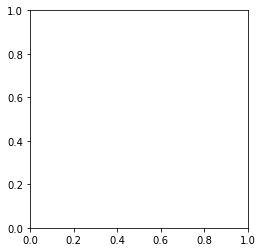

In [4]:
plt.imshow([3])

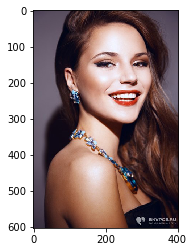

In [10]:
im = getImg(df['photo_url'][16])
plt.imshow(im)

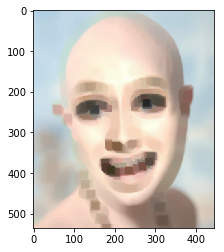

In [248]:
# Erosion

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(im,kernel,iterations = 4)
plt.imshow(erosion)

In [249]:
ims = [getImg(df['photo_url'][i])for i in range(5)]


[212.303390388183, 212.303390388183, 212.303390388183, 212.303390388183, 212.303390388183]
[212.303390388183, 212.303390388183, 212.303390388183, 212.303390388183, 212.303390388183]


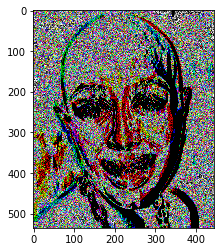

In [250]:
# Edges
laps = [cv2.Laplacian(im,cv2.CV_64F,ksize=7) for img  in ims]
plt.imshow(laps[4])
print [np.mean(im) for img in laps] 
print [np.mean(im) for img in  ims]

laplacian = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=13)
plt.imshow(laplacian)

[0.70627043298680392, 0.70627043298680392, 0.70627043298680392, 0.70627043298680392, 0.70627043298680392]
[113.06366136622759, 148.23895242167742, 212.303390388183, 109.47104659152376, 134.16442059629244]


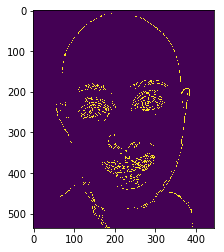

In [267]:
# Edges

#plt.imshow(laps[4])
print [np.mean(img) for img in laps] 
print [np.mean(img) for img in  ims]

edges = cv2.Canny(im,80,80)
plt.imshow(edges)

In [268]:
edges.mean()

6.3472855192691382

### Faces detection

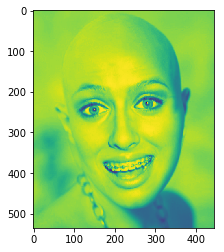

In [269]:
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../data/haarcascade_eye.xml')

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

[[ 44 101 356 356]] [[199  83  86  86]
 [ 56 103  78  78]
 [ 70 313  26  26]]


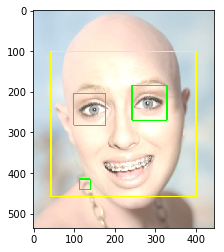

In [270]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(im,(x,y),(x+w,y+h),(255,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = im[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(im)
print faces,eyes

### Corners


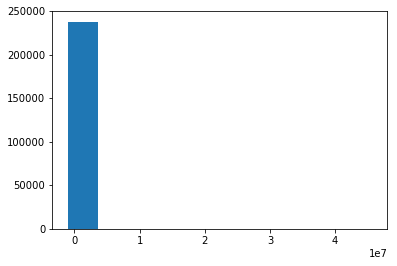

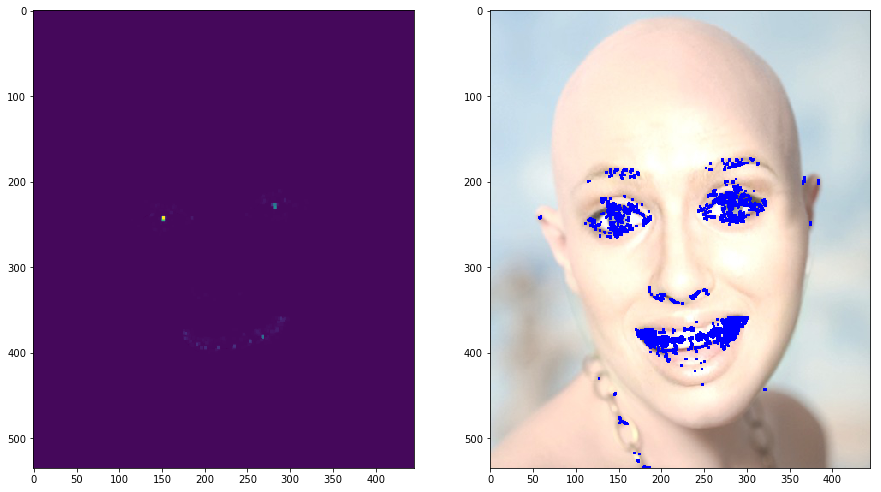

In [190]:
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
_dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(_dst,None)

row = dst.ravel()
plt.hist(row)
thr= np.percentile(row,97)

# Threshold for an optimal value, it may vary depending on the image.
im[dst>thr]=[0,0,255]

# plot
fig = plt.figure(figsize=(15, 10)) 
gs = gridspec.GridSpec(1, 2) 
ax0 = plt.subplot(gs[0])
ax0.imshow(dst)
ax1 = plt.subplot(gs[1])
ax1.imshow(im)



In [192]:
jj


(2682, 2)

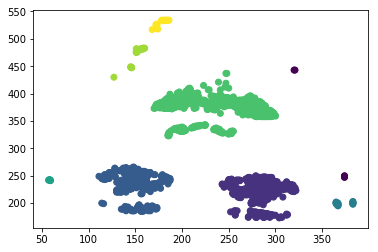

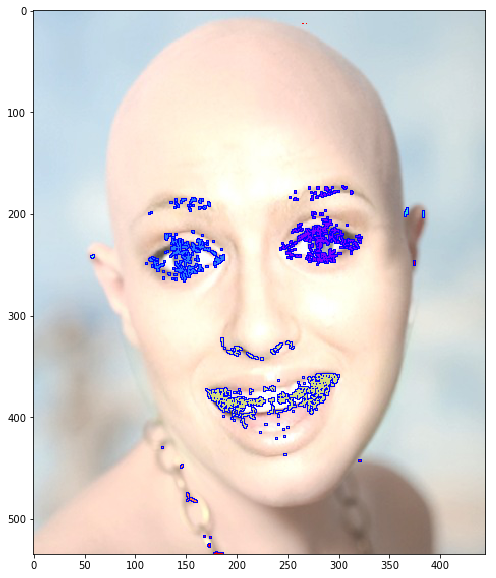

In [193]:
plt.scatter(X[:,1],X[:,0],c=labs)
lab_cols = cm.rainbow( labs/float(max(labs)))
for n in range(X.shape[0]):
    p = X[n]
    im[p[0],p[1]]=lab_cols[n][:3]*255
    if labs[n]==-1:
        im[p[0],p[1]]=[255,0,0]
fig = plt.figure(figsize=(15, 10)) 
plt.imshow(im)Y
X.shape

(array([ 2519.,   309.,    33.,  2171.,    73.,   229.,   788.,    57.,
          356.,   760.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

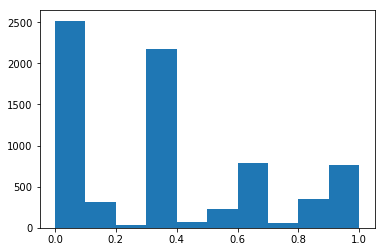

In [172]:
plt.hist(labs/float(max(labs)))


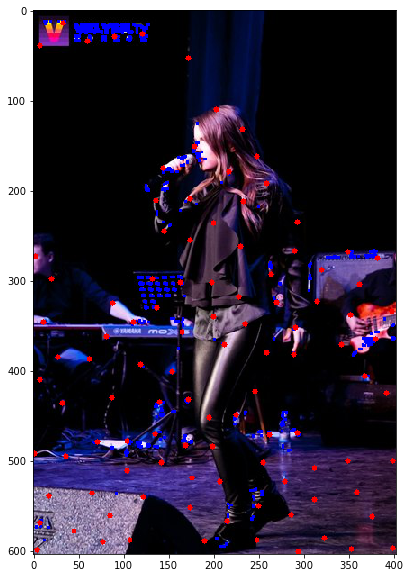

In [96]:
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,105,0.01,30)
corners = np.int0(corners)
img = np.asarray(im)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
fig = plt.figure(figsize=(15, 10)) 
plt.imshow(img)

In [198]:
corn = fet.Corners(im)

In [201]:
corn.cluster()

### Measure contrast

[(array([160859,   8184,   6161,   4829,   5846,   6381,   7447,   5888,
           5226,   3822,   3359,   1984,   1835,   1783,   1924,   1619,
           1725,   1481,   1606,   1295,   1277,    941,    808,    589,
            539,    435,    519,    359,    550,   4141]),
  array([   0. ,    8.5,   17. ,   25.5,   34. ,   42.5,   51. ,   59.5,
           68. ,   76.5,   85. ,   93.5,  102. ,  110.5,  119. ,  127.5,
          136. ,  144.5,  153. ,  161.5,  170. ,  178.5,  187. ,  195.5,
          204. ,  212.5,  221. ,  229.5,  238. ,  246.5,  255. ])),
 (array([164451,  15991,  10230,   8111,   8273,   5743,   5001,   3333,
           2635,   1829,   2070,   1739,   1655,   1467,   1658,   1496,
           1657,   1267,   1101,    797,    678,    485,    436,    341,
            265,    171,    195,    168,    103,     66]),
  array([   0. ,    8.5,   17. ,   25.5,   34. ,   42.5,   51. ,   59.5,
           68. ,   76.5,   85. ,   93.5,  102. ,  110.5,  119. ,  127.5,
          1

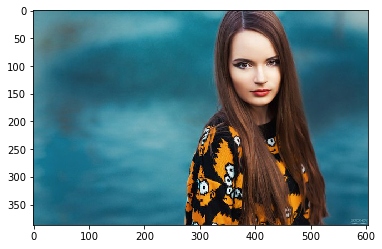

In [238]:

im = getImg(df['photo_url'][13])
plt.imshow(im)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
h =  np.histogram(gray)
rgbhist = [np.histogram(img[:,:,i],bins = 30) for i in range(3)]
rgbhist

In [241]:
ent = [scipy.stats.entropy(rgbhist[i][0]) for i in range(3)]
print "rgb",ent
print"mean:",np.mean(ent)
print "gray:", scipy.stats.entropy(h[0])
print ""

rgb [1.6711182273271612, 1.5064549739359594, 2.0889491648797844]
mean: 1.75550745538
gray: 1.133447855



In [242]:
im.shape

(387, 604, 3)

In [282]:
gray.shape

(535, 445)

In [316]:
if 2>1: print"ho"

ho


In [ ]:
df= getUsers()
df_f = fet.generate_features(df[:300],verbose=1)

> generating features for num 0
> generating features for num 1
> generating features for num 2
> generating features for num 3
> generating features for num 4
> generating features for num 5
> generating features for num 6
> generating features for num 7
> generating features for num 8
> generating features for num 9
> generating features for num 10
> generating features for num 11
> generating features for num 12
> generating features for num 13
> generating features for num 14
> generating features for num 15
> generating features for num 16
> generating features for num 17
> generating features for num 18
> generating features for num 19
> generating features for num 20
> generating features for num 21
> generating features for num 22
> generating features for num 23
> generating features for num 24
> generating features for num 25
> generating features for num 26
> generating features for num 27
> generating features for num 28
> generating features for num 29
> generating feature

In [6]:
df_f

,id,photo_url,likes,comments,reposts,user_id,city_id,videos,audios,photos,...,friends,followers,pages,subscriptions,contrast_gray,contrast_rgb,edges_mean,eye_rel,face_count,face_rel
0,239310020.0,https://pp.userapi.com/c5357/u5592362/-6/x_a3e...,50324.0,1140.0,17.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,1.881910,2.755668,22.728422,0.000000,0.0,0.000000
1,264345668.0,https://pp.userapi.com/c5278/u5592362/-6/x_6fb...,44233.0,567.0,19.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.202851,3.117545,22.633053,0.000000,0.0,0.000000
2,264545904.0,https://pp.userapi.com/c5280/u5592362/-6/x_d4f...,46453.0,1649.0,38.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,1.401401,2.439225,5.889930,0.059460,1.0,0.532336
3,266899318.0,https://pp.userapi.com/c11494/u5592362/-6/x_de...,36220.0,111.0,32.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.168139,3.171228,26.766370,0.004949,1.0,0.049179
4,266737370.0,https://pp.userapi.com/c11139/u5592362/-6/x_cb...,43826.0,211.0,55.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.232965,3.291759,24.242600,0.000000,0.0,0.000000
5,267170074.0,https://pp.userapi.com/c4948/u5592362/-6/x_484...,41360.0,49.0,15.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.190260,3.280761,59.805922,0.000000,0.0,0.000000
6,267545500.0,https://pp.userapi.com/c5305/u5592362/-6/x_96f...,58758.0,48.0,90.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.048305,2.682910,12.285316,0.036616,1.0,0.300319
7,268074238.0,https://pp.userapi.com/c5306/u5592362/-6/x_93d...,43365.0,29.0,19.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.029345,3.059943,21.994882,0.000000,0.0,0.000000
8,268841385.0,https://pp.userapi.com/c5306/u5592362/-6/x_022...,39271.0,25.0,133.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.207114,2.974980,44.486603,0.000000,0.0,0.000000
9,268839730.0,https://pp.userapi.com/c5306/u5592362/-6/x_a69...,40275.0,31.0,38.0,5592362.0,1.0,44.0,3.0,2286.0,...,334.0,1642033.0,8.0,0.0,2.042918,2.859723,48.698664,0.000000,0.0,0.000000


## Test run of classifocation

In [7]:
import sklearn.ensemble as ens
import sklearn.preprocessing as prp
import sklearn.utils as utl
from sklearn.model_selection import cross_validate

In [8]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.19.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: Andreas Mueller
Author-email: amueller@ais.uni-bonn.de
License: new BSD
Location: /home/fourier/anaconda2/lib/python2.7/site-packages
Requires: 


In [95]:
# data preprocess
keys = df_f.keys()
keys_f = delFromList(keys,['id','photo_url','likes','user_id','albums'])
                         #  'reposts','pages','albums','audios','videos','photos','comments','friends'])
data = df_f.filter(keys_f)

scaler = prp.StandardScaler()
X = scaler.fit_transform(np.asarray(data))
labels = df['likes'][:len(df_f)]
y = (np.asarray(labels) - np.mean(labels))/np.std(labels)

#shuffle
X,y = utl.shuffle(X,y)

### Run regression and analyse importances

In [129]:
forest = ens.RandomForestRegressor(n_estimators=80,max_depth=9,min_samples_split=10,max_leaf_nodes=8)
forest_def = ens.RandomForestRegressor()

scores= cross_validate(forest,X,y,cv=5)
trs = scores['train_score']
tss = scores['test_score']
print "TRAIN",trs,"\nmean:",np.mean(trs)
print"TEST" ,tss,'\nmean',np.mean(tss)
scores

TRAIN [ 0.90666037  0.90247038  0.91485314  0.94336858  0.89886467] 
mean: 0.913243429442
TEST [ 0.87082514  0.74889301  0.828566    0.63110421  0.86275546] 
mean 0.788428763487


{'fit_time': array([ 0.68842101,  0.60233283,  0.59463286,  0.59570003,  0.61961007]),
 'score_time': array([ 0.01105499,  0.0131681 ,  0.01209116,  0.011271  ,  0.01211596]),
 'test_score': array([ 0.87082514,  0.74889301,  0.828566  ,  0.63110421,  0.86275546]),
 'train_score': array([ 0.90666037,  0.90247038,  0.91485314,  0.94336858,  0.89886467])}

<Container object of 16 artists>

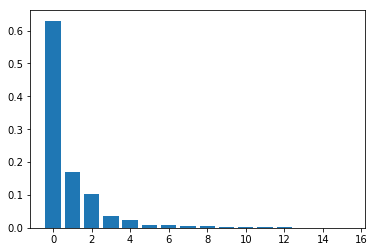

In [108]:
forest.fit(X,y)
imp = pd.DataFrame({"keys":keys_f,"ims":forest.feature_importances_})

srt = imp.sort_values('ims',ascending = False)
plt.bar(range(len(imp)),srt['ims'],)

In [109]:
print np.std(y),np.max(y),np.min(y)
imp.sort_values('ims',ascending = False)


1.0 2.83697023717 -1.25116670145


,ims,keys
3,0.629840,videos
1,0.168689,reposts
7,0.104207,followers
6,0.037030,friends
12,0.023873,edges_mean
15,0.008938,face_rel
4,0.007438,audios
13,0.005195,eye_rel
10,0.004950,contrast_gray
0,0.003863,comments


(array([ 20.,  18.,  27.,   9.,   2.,   6.,  10.,   3.,   3.,   2.]),
 array([  11445. ,   26908.6,   42372.2,   57835.8,   73299.4,   88763. ,
         104226.6,  119690.2,  135153.8,  150617.4,  166081. ]),
 <a list of 10 Patch objects>)

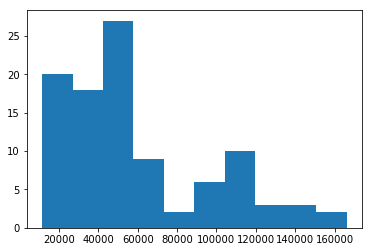

In [93]:
plt.hist(labels)

In [94]:
11*0.2

2.2